In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os


# Replace with the actual paths to your JSON files
json_paths = [os.path.join(os.path.dirname(os.getcwd()), 'log_dir/scaling_factor_0.1_v3_modelscale3_attempt2_bs256_acc1_clipv5.0_configv2_scratch_e10/eval_student_model_urma.json'),
              os.path.join(os.path.dirname(os.getcwd()), 'log_dir/scaling_factor_0.3_v3_modelscale3_attempt2_bs256_acc1_clipv5.0_configv2_scratch_e10_liu/eval_student_model_urma.json'),
              os.path.join(os.path.dirname(os.getcwd()), 'log_dir/scaling_factor_0.5_v3_modelscale3_attempt2_bs256_acc1_clipv5.0_configv2_scratch_e10/eval_student_model_urma.json'),
                os.path.join(os.path.dirname(os.getcwd()), 'log_dir/scaling_factor_1.0_v3_modelscale3_attempt2_bs256_acc1_clipv5.0_configv2_scratch_resumee3_3_liu/eval_student_model_urma.json'),
              ]

# Function to read JSON files and load dictionaries
def load_dicts_from_json(paths):
    data_dicts = []
    for path in paths:
        with open(path, "r") as f:
            data_dicts.append(json.load(f))
    return data_dicts

# Function to calculate means and standard deviations
def calculate_stats(data_dicts):
    means = []
    stds = []
    for data in data_dicts:
        values = [v["average_return"] for v in data.values()]
        means.append(np.mean(values))
        stds.append(np.std(values))
    return means, stds

# Load data from JSON files
data_dicts = load_dicts_from_json(json_paths)

In [ ]:
import math

# Function to check if a value is NaN
def is_nan(value):
    return isinstance(value, float) and math.isnan(value)

def remove_nans(data_dict):
    # Iterate through the list of dictionaries
    for dict_index, data in enumerate(data_dict):
        keys_to_remove = []  # Collect keys to remove in this dict
        for key, sub_dict in data.items():
            if 'average_return' in sub_dict and is_nan(sub_dict['average_return']):
                # Log info message
                print(f"[INFO] NaN value found in entry '{key}' at index {dict_index}")
                # Add the key to the removal list
                keys_to_remove.append(key)
        # Remove the keys with NaN values
        for key in keys_to_remove:
            del data[key]
    return data_dict

data_dicts = remove_nans(data_dicts)

In [ ]:
""# Create the plot
plt.figure(figsize=(10, 6))

labels = ['10%', '30%', '50%', '100%']

for i, data_dict in enumerate(data_dicts):
    # Extract Gendogs and their average returns
    gendogs = list(data_dict.keys())
    rewards = [data_dict[gendog]['average_return'] for gendog in gendogs]

    # X positions for the bars
    x = np.arange(len(gendogs))  # The label locations
    width = 0.35  # Width of the bars

    plt.bar(x + i*width/len(data_dicts), rewards, width, label=labels[i], alpha=0.7, edgecolor='black')

# Add titles and labels
plt.title("Comparison of Average Returns for Each Gendog", fontsize=16)
plt.xlabel("Gendog", fontsize=14)
plt.ylabel("Average Return", fontsize=14)
plt.xticks(x, gendogs, fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [10]:
!pip install seaborn

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Improved plot_histograms_separately function
def plot_histograms_separately(data_dicts):
    num_dicts = len(data_dicts)
    cols = 2  # Number of columns for subplots
    rows = (num_dicts + 1) // cols  # Calculate the number of rows needed

    # Set a consistent style
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, rows * 4))

    for i, data_dict in enumerate(data_dicts):
        values = [v["average_return"] for v in data_dict.values()]
        plt.subplot(rows, cols, i + 1)
        plt.hist(values, bins=20, color='#4c72b0', alpha=0.85, edgecolor='black')
        plt.xlabel("Average Return", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.title(f"Histogram for File {i+1}", fontsize=14)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Example usage
if data_dicts:
    plot_histograms_separately(data_dicts)


NameError: name 'data_dicts' is not defined

## Visualize expert performance


In [15]:
import os
import json
from datetime import datetime

# def get_rewards_as_dict(base_path, tasks):
#     """
#     Extract the most recent 'average_return' for each task and return as a single dictionary.
#     """
#     results = {}

#     for task_prefix in tasks:
#         # Find all folders matching the task prefix
#         matching_folders = [
#             f for f in os.listdir(base_path) if f.startswith(task_prefix) and os.path.isdir(os.path.join(base_path, f))
#         ]

#         if not matching_folders:
#             print(f"No matching folders found for task prefix '{task_prefix}'")
#             continue

#         # Find the most recent subfolder
#         most_recent = None
#         for folder in matching_folders:
#             task_path = os.path.join(base_path, folder)
#             subfolders = [
#                 d for d in os.listdir(task_path)
#                 if os.path.isdir(os.path.join(task_path, d)) and d.replace("_", "-").replace("-", "").isdigit()
#             ]
#             print(0, task_path, subfolders)

#             if not subfolders:
#                 continue

#             subfolders.sort(key=lambda d: datetime.strptime(d, "%Y-%m-%d_%H-%M-%S_v1"), reverse=True)
#             recent_subfolder = subfolders[0]
#             recent_path = os.path.join(task_path, recent_subfolder, "h5py_record", "reward_log_file.json")

#             if os.path.exists(recent_path):
#                 most_recent = recent_path
#                 break
                
#         print(2, matching_folders, most_recent)
#         # Retrieve the data for the task
#         if most_recent:
#             try:
#                 with open(most_recent, "r") as f:
#                     data = json.load(f)
#                     # Extract task-specific data and add to results
#                     if task_prefix in data:
#                         results[task_prefix] = {"average_return": data[task_prefix].get("average_return", "N/A")}
#                     else:
#                         print(f"Task '{task_prefix}' not found in JSON file: {most_recent}")
#             except (json.JSONDecodeError, KeyError):
#                 print(f"Error reading JSON data from '{most_recent}'")

#     return results


def get_rewards_as_dict(base_path, tasks):
    """
    Extract the most recent 'average_return' for each task and return as a single dictionary.
    """
    results = {}

    for task_prefix in tasks:
        # Find all folders matching the task prefix exactly before the first underscore
        matching_folders = [
            f for f in os.listdir(base_path)
            if f.startswith(task_prefix + "_") and os.path.isdir(os.path.join(base_path, f))
        ]

        # Ensure there's exactly one matching folder
        if len(matching_folders) == 0:
            print(f"No matching folders found for task prefix '{task_prefix}'")
            continue
        if len(matching_folders) > 1:
            raise ValueError(f"Multiple folders found for task prefix '{task_prefix}': {matching_folders}")

        task_path = os.path.join(base_path, matching_folders[0])

        # Find the most recent subfolder
        subfolders = [
            d for d in os.listdir(task_path)
            if os.path.isdir(os.path.join(task_path, d)) and d.startswith("2025-")
        ]

        if not subfolders:
            print(f"No subfolders found in '{task_path}'")
            continue

        # Sort subfolders by timestamp, assuming format: "2025-01-14_01-05-29_v1"
        subfolders.sort(key=lambda d: datetime.strptime(d.split("_v")[0], "%Y-%m-%d_%H-%M-%S"), reverse=True)
        most_recent_subfolder = subfolders[0]
        recent_path = os.path.join(task_path, most_recent_subfolder, "h5py_record", "reward_log_file.json")

        # Retrieve the data for the task
        if os.path.exists(recent_path):
            try:
                with open(recent_path, "r") as f:
                    data = json.load(f)
                    # Extract task-specific data and add to results
                    if task_prefix in data:
                        results[task_prefix] = {"average_return": data[task_prefix].get("average_return", "N/A")}
                    else:
                        print(f"Task '{task_prefix}' not found in JSON file: {recent_path}")
            except (json.JSONDecodeError, KeyError) as e:
                print(f"Error reading JSON data from '{recent_path}': {e}")
        else:
            print(f"Reward log file not found: {recent_path}")

    return results

# Example usage
# tasks = [
#     "Gendog266", "Gendog252", "Gendog72", "Gendog71", "Gendog207",
#     "Gendog104", "Gendog128", "Gendog272", "Gendog215", "Gendog248",
#     "Gendog229", "Gendog280", "Gendog278", "Gendog32", "Gendog55",
#     "Gendog75", "Gendog0", "Gendog282", "Gendog63", "Gendog47",
#     "Gendog241", "Gendog222", "Gendog286", "Gendog181", "Gendog183",
#     "Gendog97", "Gendog250", "Gendog20", "Gendog7", "Gendog258",
#     "Gendog111", "Gendog41", "Gendog132", "Gendog113", "Gendog31",
#     "Gendog290", "Gendog124", "Gendog46", "Gendog170", "Gendog48",
#     "Gendog204", "Gendog260", "Gendog298", "Gendog226", "Gendog261",
#     "Gendog37", "Gendog144", "Gendog244"
# ]

tasks = [f"Genhexapod{i}" for i in range(0, 336)]

base_path = "/liudai-fast-vol/code/embodiment-scaling-law/logs/rsl_rl/"

expert_reward_results = get_rewards_as_dict(base_path, tasks)

# # Print results
# for task, average_return in expert_reward_results.items():
#     print(f"Task: {task}, Average Return: {average_return}")


Reward log file not found: /liudai-fast-vol/code/embodiment-scaling-law/logs/rsl_rl/Genhexapod150_genhexapod__KneeNum_l1-2_l2-2_l3-2_l4-2_l5-2_l6-2__ScaleJointLimit_l1-1_l2-0_l3-0_l4-0_l5-0_l6-0_0_2__Geo_lengthen_thigh_0_4/2025-01-12_10-19-03/h5py_record/reward_log_file.json
Reward log file not found: /liudai-fast-vol/code/embodiment-scaling-law/logs/rsl_rl/Genhexapod151_genhexapod__KneeNum_l1-2_l2-2_l3-2_l4-2_l5-2_l6-2__ScaleJointLimit_l1-1_l2-0_l3-0_l4-0_l5-0_l6-0_0_2__Geo_lengthen_calf_1_6/2025-01-12_10-28-00/h5py_record/reward_log_file.json
Reward log file not found: /liudai-fast-vol/code/embodiment-scaling-law/logs/rsl_rl/Genhexapod152_genhexapod__KneeNum_l1-2_l2-2_l3-2_l4-2_l5-2_l6-2__ScaleJointLimit_l1-1_l2-0_l3-0_l4-0_l5-0_l6-0_0_2__Geo_lengthen_calf_1_2/2025-01-13_11-53-28/h5py_record/reward_log_file.json
Reward log file not found: /liudai-fast-vol/code/embodiment-scaling-law/logs/rsl_rl/Genhexapod153_genhexapod__KneeNum_l1-2_l2-2_l3-2_l4-2_l5-2_l6-2__ScaleJointLimit_l1-1_l2-0

In [16]:
len(expert_reward_results)

301

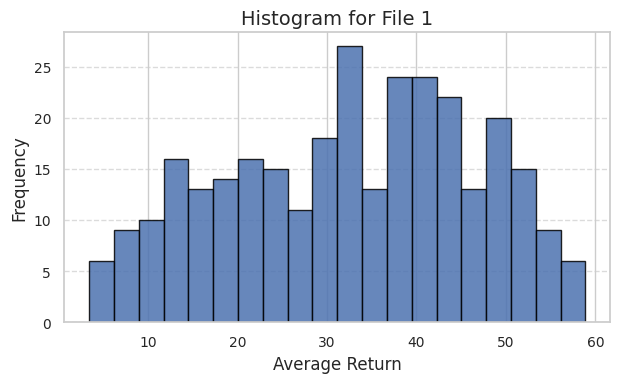

In [17]:
plot_histograms_separately([expert_reward_results])

## Comparative study

In [ ]:
# Compute expert_mean and expert_std
expert_values = [v["average_return"] for v in expert_reward_results.values()]
expert_mean = np.mean(expert_values)
expert_std = np.std(expert_values)

# Calculate statistics for bar chart
means = [np.mean([v["average_return"] for v in d.values()]) for d in data_dicts]
stds = [np.std([v["average_return"] for v in d.values()]) for d in data_dicts]

# Add expert values to bar chart
x_labels = [f"File {i+1}" for i in range(len(data_dicts))] + ["Expert"]
means.append(expert_mean)
stds.append(expert_std)

# Plot bar chart with error bars
plt.figure(figsize=(10, 6))
plt.bar(x_labels, means, yerr=stds, capsize=5, alpha=0.7, color=['blue'] * len(data_dicts) + ['red'])
plt.ylabel("Mean Average Return")
plt.title("Bar Chart with Error Bars (Including Expert)")
plt.tight_layout()
plt.show()

# Plot line plot with expert mean and std
all_means = [np.mean([v["average_return"] for v in d.values()]) for d in data_dicts]
all_stds = [np.std([v["average_return"] for v in d.values()]) for d in data_dicts]
labels = [f"File {i+1}" for i in range(len(data_dicts))]

plt.figure(figsize=(10, 6))
plt.errorbar(labels, all_means, yerr=all_stds, fmt='-o', capsize=5, color='green', alpha=0.7, label="Files")
plt.axhline(expert_mean, color='red', linestyle='--', label="Expert Mean")
plt.axhline(expert_mean + expert_std, color='red', linestyle=':', label="Expert Mean + Std")
plt.axhline(expert_mean - expert_std, color='red', linestyle=':', label="Expert Mean - Std")
plt.ylabel("Average Return")
plt.title("Line Plot Comparing All Files (Including Expert)")
plt.legend()
plt.tight_layout()
plt.show()